<a href="https://colab.research.google.com/github/Dhawaldwivedi/Bca-5th-sem-AI-mmdu/blob/main/ai-ml1-g1/Brain_Tumor_Detection_using_CNN_BCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

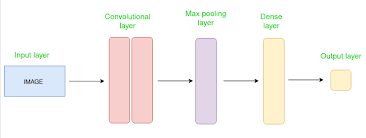

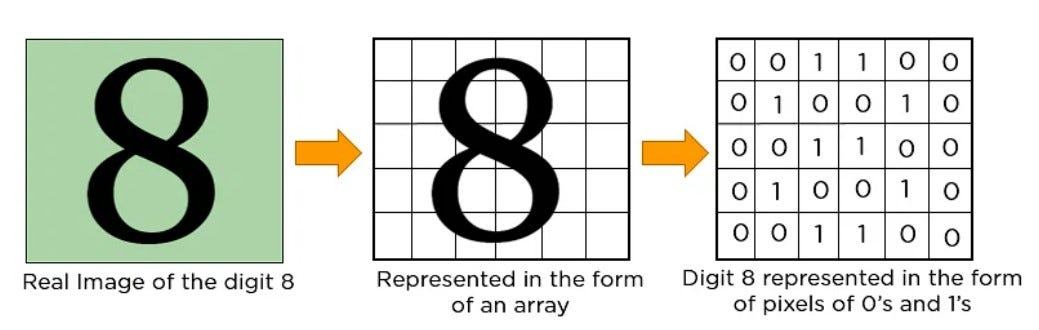

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import zipfile
# Step 2: Extract the archive.zip
zip_filename = "archive.zip"
extract_dir = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(" Extraction Done!")
print(" Extracted folders:", os.listdir(extract_dir))

 Extraction Done!
 Extracted folders: ['yes', 'no', 'brain_tumor_dataset']


In [ ]:
# Try to detect the path that contains 'yes' and 'no' folders
base_path = extract_dir
subfolders = os.listdir(base_path)

# If there's an extra folder inside, dive one level deeper
if 'yes' not in subfolders and 'no' not in subfolders:
    base_path = os.path.join(base_path, subfolders[0])  # first inner folder
    print(f"Adjusted base path to: {base_path}")

# Final check
print(" Dataset Path:", base_path)
print("Folders:", os.listdir(base_path))


 Dataset Path: /content/brain_tumor_dataset
Folders: ['yes', 'no', 'brain_tumor_dataset']


In [ ]:

# Step 4: Load Dataset (Using Encoder-Based Labeling)

from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

data = []
result = []

# Initialize OneHotEncoder for binary labels (0 = Tumor, 1 = No Tumor)
encoder = OneHotEncoder()
encoder.fit([[0], [1]])   # two categories: yes (0), no (1)

# Paths for 'yes' and 'no' folders
yes_path = os.path.join(base_path, "yes")
no_path  = os.path.join(base_path, "no")

image_size = 128  # as per data

# ----------------------
#  Load Tumor Images
# ----------------------
paths = []
for r, d, f in os.walk(yes_path):
    for file in f:
        if file.lower().endswith('.jpg'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((image_size, image_size))
    img = np.array(img)
    if img.shape == (image_size, image_size, 3):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())  # Tumor (Yes)

# ----------------------
#  Load Non-Tumor Images
# ----------------------
paths = []
for r, d, f in os.walk(no_path):
    for file in f:
        if file.lower().endswith('.jpg'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((image_size, image_size))
    img = np.array(img)
    if img.shape == (image_size, image_size, 3):
        data.append(img)
        result.append(encoder.transform([[1]]).toarray())  # No Tumor


In [ ]:
data = np.array(data)
data.shape

(213, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(213,2)
print(result)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
y_train.shape

(170, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4695 - loss: 59.8240 - val_accuracy: 0.5581 - val_loss: 58.7013
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6948 - loss: 7.2048 - val_accuracy: 0.7209 - val_loss: 0.9990
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6368 - loss: 1.3368 - val_accuracy: 0.5814 - val_loss: 2.7094
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7432 - loss: 0.5487 - val_accuracy: 0.6512 - val_loss: 2.5247
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7702 - loss: 0.4621 - val_accuracy: 0.6279 - val_loss: 2.2484
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 0.5029 - val_accuracy: 0.6744 - val_loss: 0.9173
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8582 - loss: 0.3669 - val_accuracy: 0.6744 - val_loss: 0.6061
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8524 - loss: 0.3576 - val_accuracy: 0.6977 - val_loss: 0.6948

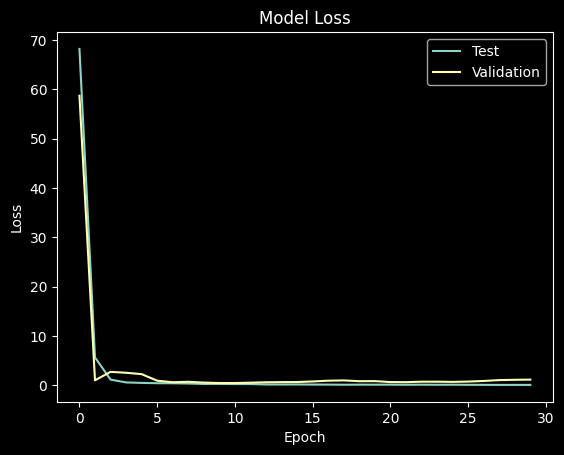

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.7306 - loss: 1.0399
Test Accuracy: 0.7209302186965942


In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.85366% Confidence This Is Its a Tumor


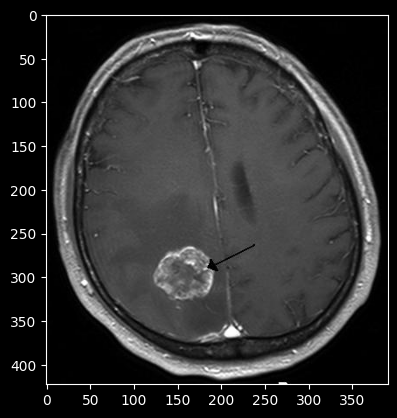

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor yes 1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor yes 2.avif")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
# Save the model
model.save('brain_tumor_model.keras')
print("Model saved as brain_tumor_model.keras")

In [ ]:

from matplotlib.pyplot import imshow
img = Image.open(r"/content/Shop.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor no 4.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))